<a href="https://colab.research.google.com/github/Osw1997/An-Introduction-to-Statistical-Learning/blob/main/Scripts/Linear%20regression/applied_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 - Linear regression

# Applied exercises
---
---
---
## Exercise 8
## Involved dataset: Auto

In [2]:
!pip install --upgrade scipy
!pip install --upgrade plotly

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 26.5 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

In [4]:
import scipy
scipy.__version__

'1.7.3'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
auto = pd.read_csv('drive/MyDrive/itsl_datasets/Auto.csv')
# auto = pd.read_csv("../../Datasets/Auto.csv")
## Cleaning data
# Getting incorrect rows and getting mean of correct rows
valid_rows = auto['horsepower'] != '?'
mean_valid_rows = pd.to_numeric(auto[valid_rows]['horsepower']).mean()
# Correcting data
auto[~valid_rows] = mean_valid_rows
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
auto['mpg'] = pd.to_numeric(auto['mpg'])

auto.describe()
# auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,24.466365,6.718758,193.279211,104.469388,2941.398859,16.661327,76.338405,2.872410
std,11.916122,11.182938,104.465120,38.247388,902.933828,10.300906,4.849520,11.516536
min,9.000000,3.000000,68.000000,46.000000,104.469388,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.469388,76.000000,2219.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2790.000000,15.500000,76.000000,1.000000
75%,29.500000,8.000000,262.000000,125.000000,3609.000000,17.300000,79.000000,2.000000
max,104.469388,104.469388,455.000000,230.000000,5140.000000,104.469388,104.469388,104.469388


In [7]:
linear_regression = stats.linregress(auto["horsepower"], auto["mpg"])
print(f"Slope: {linear_regression.slope}, intercept: {linear_regression.intercept}")

Slope: -0.15784473335365345, intercept: 40.956307738900364


In [8]:
print(f"Is Pvalue < 0.05? {linear_regression.pvalue < 0.5} ({linear_regression.pvalue})")
print(f"Is intercept > 0? {linear_regression.intercept > 0} ({linear_regression.intercept})")
print(f"Slope B_1 = {linear_regression.slope}")

print("")
print("mpg(HP) = B_0 + B_1 * HP ")
print("HP = 98 hp")
print(f"mpg(98) = {linear_regression.intercept} + {linear_regression.slope} * 98")
print(f"mpg(98) = {linear_regression.intercept + linear_regression.slope * 98}")

print("")
t_test = lambda p, df: abs(t.ppf(p/2, df))
conf_interval = t_test(0.05, len(auto['mpg']))
print(f"slope (95%): {linear_regression.slope:.6f} +/- {conf_interval*linear_regression.stderr:.6f}")
print(f"slope (95%): {linear_regression.intercept:.6f} +/- {conf_interval*linear_regression.intercept_stderr:.6f}")

Is Pvalue < 0.05? True (2.835654435365766e-27)
Is intercept > 0? True (40.956307738900364)
Slope B_1 = -0.15784473335365345

mpg(HP) = B_0 + B_1 * HP 
HP = 98 hp
mpg(98) = 40.956307738900364 + -0.15784473335365345 * 98
mpg(98) = 25.487523870242327

slope (95%): -0.157845 +/- 0.026570
slope (95%): 40.956308 +/- 2.955523


## Questions
### Is there any relationship between predictor and the response?
#### A = **Yes. Pvalue is less than 0.05 and intercept is != 0. So, we can discard H0 (null) hipotesis**
### How strong is the relationship between the predictor and the response? R^2 (???)
#### A = **Well, B_1 is -0.16. So, there is a negative correlation**
### Is the relationship between the predictor and the response positive or negative?
#### A = **Negative**
### What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?
#### mpg(98) = 40.956307738900364 + -0.15784473335365348 * 98
#### **mpg(98) = 25.48752387024232**
#### slope (95%): -0.157845 +/- 0.026570
#### **slope (95%): 40.956308 +/- 2.955523**

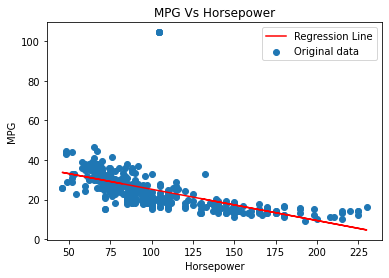

In [9]:
# Plot the response and the predictor. Show the least squares regression line.
plt.scatter(auto["horsepower"], auto['mpg'], label="Original data")
plt.title("MPG Vs Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.plot(auto["horsepower"], linear_regression.intercept + linear_regression.slope * auto['horsepower'], 'r', label="Regression Line")
plt.legend()
plt.show()

---
---
---

## Exercise 9
## Involved dataset: Auto
## Type regression: Multiple

In [10]:
# (a) Produce a scatterplot matrix which includes all of the variables
# in the data set.
import plotly.express as px
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 
                   'weight', 'acceleration', 'year', 'origin']
fig = px.scatter_matrix(auto[numeric_columns])
fig.update_traces(diagonal_visible=False)
fig.show()

In [11]:
# (b) Compute the matrix of correlations between the variables using
# the function cor(). You will need to exclude the name variable, cor() which is qualitative.
import plotly.express as px
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 
                   'weight', 'acceleration', 'year'
                #    , 'origin'
                   ]

import numpy as np
corr_matrix = np.corrcoef(auto[numeric_columns], rowvar=False)

# corr_matrix

fig = px.imshow(corr_matrix
                , text_auto=True
                , labels=dict(x="Columns", y="Columns")
                , x=numeric_columns
                , y=numeric_columns
                , aspect="auto"
                , color_continuous_scale="BuPu"
                )
fig.update_xaxes(side="top")
fig.show()

In [12]:
# (c) Use the lm() function to perform a multiple linear regression
# with mpg as the response and all other variables except name as
# the predictors. Use the summary() function to print the results.
import statsmodels.formula.api as smf
mult_linear_regression_instance = smf.ols(formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=auto)
mlr = mult_linear_regression_instance.fit()
mlr.summary2()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.923    
Dependent Variable: mpg              AIC:                2086.2328
Date:               2022-01-21 04:44 BIC:                2118.1043
No. Observations:   397              Log-Likelihood:     -1035.1  
Df Model:           7                F-statistic:        675.2    
Df Residuals:       389              Prob (F-statistic): 3.10e-213
R-squared:          0.924            Scale:              10.992   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept        -14.9193   4.3541 -3.4265 0.0007 -23.4799 -6.3587
cylinders         -0.8305   0.2259 -3.6771 0.0003  -1.2746 -0.3865
displacement       0.0228   0.0072  3.1507 0.0018   0.0086  0.0370
horsepower        -0.0189   0.0137 -1.3789 0.1687  -0.0457  0.0080
weight            -0.0063   0.0006 -9.8605 0.0000  -0.0076 -0.0051
acceleration       0.0429   0.0951  0.4512 0.6521  -0.1440  0.2298
year               0.7462   0.0507 14.7209 0.0000   0.6465  0.8459
origin             1.1874   0.2244  5.2920 0.0000   0.7462  1.6285
------------------------------------------------------------------
Omnibus:               37.262       Durbin-Watson:          1.304 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       66.461
Skew:                  0.575        Prob(JB):               0.000 
Kurtosis:              4.642        Condition No.:          80780 
==================================================================
* The condition number is large (8e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

## Comment on the output. For instance:
### i. Is there a relationship between the predictors and the response?
#### **A = Yes but not for all.**
### ii. Which predictors appear to have a statistically significant relationship to the response?
#### **A = All predictors except horsepower and acceleration: P>|t| > 0.05**
### iii. What does the coefficient for the year variable suggest?
#### **A = That exists a positive correlation and considered as statistically significant due to P>|t|<0.05**

In [13]:
# (d) Use the plot() function to produce diagnostic plots of the linear
# regression fit.
import plotly.express as px
# Residual = observed_value - predicted_value
# e = y - y´
list_residuals = np.zeros((1, len(auto)))
# predictors = "cylinders, displacement, horsepower, weight, acceleration, year, origin"
residuals = auto['mpg'] - mlr.predict()
fig = px.scatter(x=auto['mpg'], y=residuals, labels=["Residuals", "MPG"], title="Residuals Vs MPG")
fig.show()

### Comment on any problems you see with the fit.
#### **A = It shouldn't exist a pettern in residual plot because it indicates that our model is BIASED. In this case we can observe that there is a clear pattern (Squared). So, we have to fix it.**
### Do the residual plots suggest any unusually large outliers?
#### **A = Yes. We can observe that beyond the value of 10 for the predictor some points are higher than such value. So, I think we have some outliers.**
### Does the leverage plot identify any observations with unusually high leverage?
#### **A = Also, We can observe a high leverage in the right panel; after the mpg(100) we have a point with high leverage.**

In [14]:
# (e) Use the * and : symbols to fit linear regression models with
# interaction effects. Do any interactions appear to be statistically
# significant?
# (f) Try a few different transformations of the variables, such as
# log(X), √
# X, X2. Comment on your findings.

# I thinks this is for a different dataset. 
# 10 variables implies 10! combinations and if we use * and : operator
# it implies 2 * 10! combinations. How is that possible to put it on a chart?

---
---
---
## Exercise #10
## Involved dataset: This question should be answered using the **Carseats** data set.


In [15]:
carseats = pd.read_csv('drive/MyDrive/itsl_datasets/Carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [16]:
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [17]:
##(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.
carseats['Urban'].unique() # Yes, No
carseats['US'].unique() # Yes, No
# One one encoding (ohe)
carseats_ohe = carseats.copy()
carseats_ohe['Urban'] = pd.get_dummies(carseats['Urban']).drop('No', axis=1)
carseats_ohe['US'] = pd.get_dummies(carseats['US']).drop('No', axis=1)
carseats_ohe.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000


In [18]:
import statsmodels.formula.api as smf
mult_lin_reg_instance = smf.ols(formula="Sales ~ Price + Urban + US", data=carseats_ohe)
mult_lin_reg = mult_lin_reg_instance.fit()
mult_lin_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.234    
Dependent Variable: Sales            AIC:                1863.3121
Date:               2022-01-21 04:44 BIC:                1879.2779
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           3                F-statistic:        41.52    
Df Residuals:       396              Prob (F-statistic): 2.39e-23 
R-squared:          0.239            Scale:              6.1132   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     13.0435    0.6510   20.0357  0.0000  11.7636  14.3233
Price         -0.0545    0.0052  -10.3892  0.0000  -0.0648  -0.0442
Urban         -0.0219    0.2717   -0.0807  0.9357  -0.5560   0.5121
US             1.2006    0.2590    4.6347  0.0000   0.6913   1.7098
------------------------------------------------------------------
Omnibus:               0.676        Durbin-Watson:           1.912
Prob(Omnibus):         0.713        Jarque-Bera (JB):        0.758
Skew:                  0.093        Prob(JB):                0.684
Kurtosis:              2.897        Condition No.:           628  
==================================================================

"""

## (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!
* Well, that statistical significance for the predictor Urban is not good because it's bigger that 0.005 
* Also, something interesting is that in terms of sales, if we'd have a zero input, we'd have 13.04 sales. This is described by the Intercept value.
* We can say that if the price and if the carseat is urban, we'll have less sales because of the negative of their coefficients.
* In the other hand, if the carseart is the type US, then we'll have an increase in the sales due to our model tells us that coefficient of regression is positive.

## (c) Write out the model in equation form, being careful to handle the qualitative variables properly.
### We have 4 combinations: 
#### | Urban | US |
#### |   0   |  0 |: **Sales = 13.04 - 0.0545*Price**
#### |   0   |  1 |: Sales = 13.04 - 0.0545*Price + 1.2*(US=1) -> **Sales 14.24 - 0.0545 *Price**
#### |   1   |  0 |: Sales = 13.04 - 0.0545 * Price - 0.021 * (Urban=1) -> **Sales = 13.02 - 0.0545 * Price**
#### |   1   |  1 |: Sales = 13.04 - 0.0545 * Price + 1.2 * (US=1) - 0.021 * (Urban=1) -> **Sales = 14.22 - 0.0545 * Price**

## (d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?
### **A = Due to our absolute of t-test is greater than our significance level (5%), the only one variable that fails to reject the null hypotesis is the predictor Urban (0.9357 > 0.05), The other ones are ok.**

In [19]:
## (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.
import statsmodels.formula.api as smf
mult_lin_reg_instance = smf.ols(formula="Sales ~ Price + US", data=carseats_ohe)
mult_lin_reg = mult_lin_reg_instance.fit()
mult_lin_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.235    
Dependent Variable: Sales            AIC:                1861.3186
Date:               2022-01-21 04:44 BIC:                1873.2930
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           2                F-statistic:        62.43    
Df Residuals:       397              Prob (F-statistic): 2.66e-24 
R-squared:          0.239            Scale:              6.0979   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     13.0308    0.6310   20.6518  0.0000  11.7903  14.2713
Price         -0.0545    0.0052  -10.4161  0.0000  -0.0648  -0.0442
US             1.1996    0.2585    4.6415  0.0000   0.6915   1.7078
------------------------------------------------------------------
Omnibus:               0.666        Durbin-Watson:           1.912
Prob(Omnibus):         0.717        Jarque-Bera (JB):        0.749
Skew:                  0.092        Prob(JB):                0.688
Kurtosis:              2.895        Condition No.:           607  
==================================================================

"""

## (f) How well do the models in (a) and (e) fit the data?
### **A = Well, both models have the same R^2 value (0.239) however, the F-Statistic in the second model is better (62.43 Vs 41.52).**
### **I NEED TO UNDERSTAND AGAIN THIS CONCEPT: F-TEST**

In [20]:
## (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).
mult_lin_reg.conf_int(1 - 0.95)

,0,1
Intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


In [21]:
## (h) Is there evidence of outliers or high leverage observations in the model from (e)?
# residuals = 
residuals = carseats['Sales'] - mult_lin_reg.predict()
import plotly.express as px
# Residual = observed_value - predicted_value
# e = y - y´
fig = px.scatter(x=carseats['Sales'], y=residuals, labels=["Residuals", "Sales"], title="Residuals Vs Sales")
fig.show()

## (h) Is there evidence of outliers or high leverage observations in the model from (e)?
### **A = We can observe that there are some points that have a high leverage (Maybe) at the right of the scatter plot. Also, we can observe that there is a linear pettern in the chart**
#### **I NEED TO CHECK THIS CONCEPT: CLEAR METRIC FOR SPECIFYING IF THERE ARE OUTLIERS/LEVERAGE**

---
---
---
# Exercise 10
## In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept.



In [22]:
# Generate a predictor x and a response y as follows
np.random.seed(1)
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)

In [23]:
# (a) Perform a simple linear regression of y onto x, without an intercept. (You can perform regression without an intercept using
# the command lm(y∼x+0).)
import statsmodels.formula.api as smf
dict_data = {"Y": y, "X": x}
df = pd.DataFrame(dict_data)
lin_reg = smf.ols(formula="Y ~ X -1", data=df).fit()
lin_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.796   
Dependent Variable:     Y                AIC:                         273.3438
Date:                   2022-01-21 04:44 BIC:                         275.9489
No. Observations:       100              Log-Likelihood:              -135.67 
Df Model:               1                F-statistic:                 391.7   
Df Residuals:           99               Prob (F-statistic):          3.46e-36
R-squared (uncentered): 0.798            Scale:                       0.89191 
------------------------------------------------------------------------------------
          Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
X         2.1067         0.1064       19.7918       0.0000       1.8955       2.3180
------------------------------------------------------------------------------
Omnibus:                  0.880             Durbin-Watson:               2.106
Prob(Omnibus):            0.644             Jarque-Bera (JB):            0.554
Skew:                     -0.172            Prob(JB):                    0.758
Kurtosis:                 3.119             Condition No.:               1    
==============================================================================

"""

### Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results.
* Coefficient estimated (beta_0): 2.1067
* Standard error: 0.1064
* t-statistic: 19.7918
* p-value associated: 0.0000


In [24]:
# (b) Now perform a simple linear regression of x onto y without an intercept
import statsmodels.formula.api as smf
dict_data = {"Y": y, "X": x}
df = pd.DataFrame(dict_data)
lin_reg = smf.ols(formula="X ~ Y - 1", data=df).fit()
lin_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.796   
Dependent Variable:     X                AIC:                         101.7824
Date:                   2022-01-21 04:44 BIC:                         104.3875
No. Observations:       100              Log-Likelihood:              -49.891 
Df Model:               1                F-statistic:                 391.7   
Df Residuals:           99               Prob (F-statistic):          3.46e-36
R-squared (uncentered): 0.798            Scale:                       0.16041 
------------------------------------------------------------------------------------
          Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
Y         0.3789         0.0191       19.7918       0.0000       0.3409       0.4169
------------------------------------------------------------------------------
Omnibus:                   0.476            Durbin-Watson:               2.166
Prob(Omnibus):             0.788            Jarque-Bera (JB):            0.631
Skew:                      0.115            Prob(JB):                    0.729
Kurtosis:                  2.685            Condition No.:               1    
==============================================================================

"""

### Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results.
* Coefficient estimated (beta_0): 0.3789
* Standard error: 0.0191
* t-statistic: 19.7918
* p-value associated: 0.0000

### My comments: Due to the predictor and respoonse are inverted, then the coefficients are different. When 'Y' is the predictor, the standard error is less than the case 'X' is the predictor. In other hand, t-statistic and p-value associated to NULL hypotesis are equal in both cases.


## (c) What is the relationship between the results obtained in (a) and (b)?
### Both uses the same data but with a different interpretation. In the first one we are tryin to estimate "NORMAL" data but in second one we are multiplying the input and adding NOISE.



## For the regression of Y onto X without an intercept, the tstatistic for H0 : β = 0 takes the form βˆ/SE(βˆ). 
## Show algebraically, and confirm numerically in R, that the t-statistic can be written as

## **ANSWER**
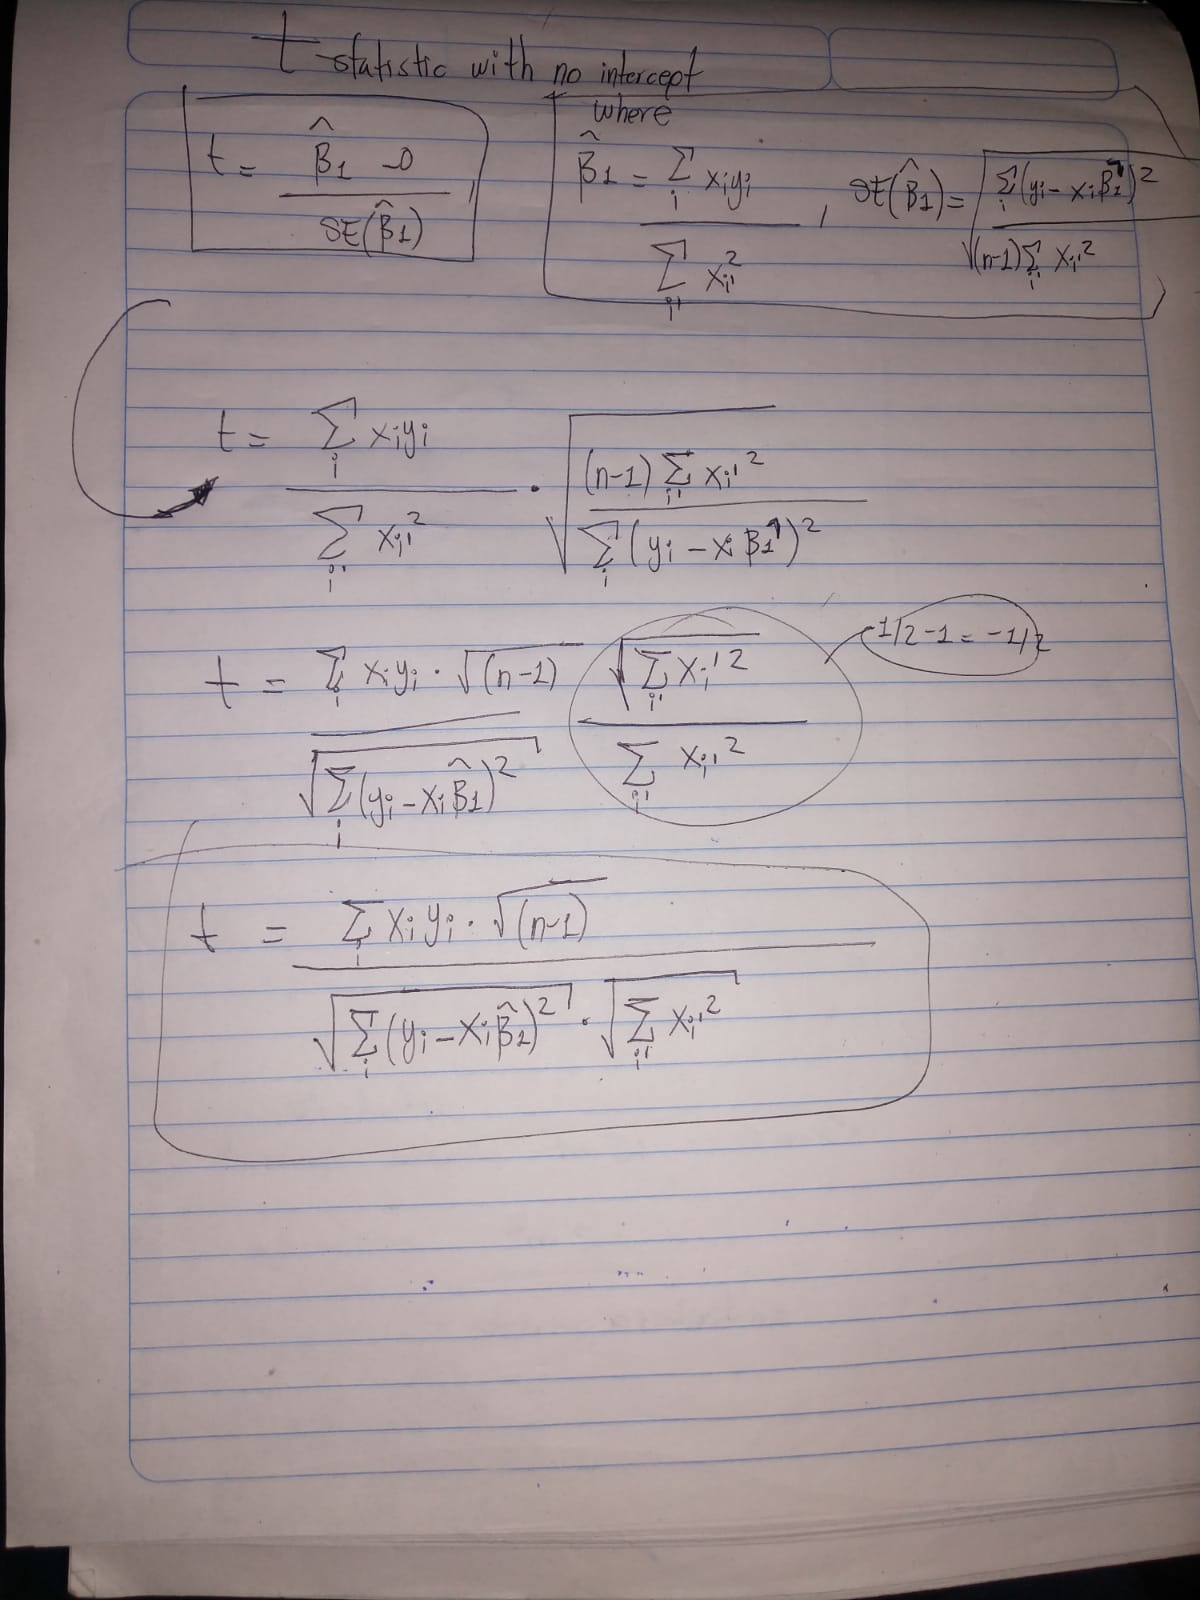




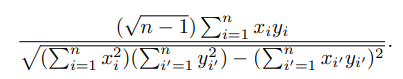

In [25]:
lin_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.796   
Dependent Variable:     X                AIC:                         101.7824
Date:                   2022-01-21 04:44 BIC:                         104.3875
No. Observations:       100              Log-Likelihood:              -49.891 
Df Model:               1                F-statistic:                 391.7   
Df Residuals:           99               Prob (F-statistic):          3.46e-36
R-squared (uncentered): 0.798            Scale:                       0.16041 
------------------------------------------------------------------------------------
          Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
Y         0.3789         0.0191       19.7918       0.0000       0.3409       0.4169
------------------------------------------------------------------------------
Omnibus:                   0.476            Durbin-Watson:               2.166
Prob(Omnibus):             0.788            Jarque-Bera (JB):            0.631
Skew:                      0.115            Prob(JB):                    0.729
Kurtosis:                  2.685            Condition No.:               1    
==============================================================================

"""

In [26]:
dict_data = {"Y": y, "X": x}
df = pd.DataFrame(dict_data)
t_test = (np.sqrt(len(x) - 1) * np.dot(x, y)) / np.sqrt((sum(x ** 2) * sum(y ** 2)) - (np.dot(x, y) ** 2))
comparison_library_mine = lin_reg.tvalues[0] - t_test
print(f"Library t-test: {lin_reg.tvalues[0]} Vs Mine t-test: {t_test}")
print(f"Difference between them: {comparison_library_mine}")

Library t-test: 19.791801987091205 Vs Mine t-test: 19.791801987091187
Difference between them: 1.7763568394002505e-14


## (e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y.

### **A = The reason for why the t-test value for X onto Y linear regression is the same as Y onto X it's because the equation only depends on the values of both vectors: Y & X and not from a another thing. We can invert the values x for y and viceversa and we'll have the same equation."**

In [27]:
# (f) In R, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go


dict_data = {"Y": y, "X": x}
df = pd.DataFrame(dict_data)
lin_reg_YX = smf.ols(formula="Y ~ X", data=df).fit()
lin_reg_XY = smf.ols(formula="X ~ Y", data=df).fit()

comparison_beta_1 = lin_reg_YX.tvalues[1] - lin_reg_XY.tvalues[1]
print(f"Y onto X t-test: {lin_reg_YX.tvalues[1]} Vs X onto Y t-test: {lin_reg_XY.tvalues[1]}")
print(f"Difference between them: {comparison_beta_1}")

Y onto X t-test: 19.782585315629255 Vs X onto Y t-test: 19.782585315629255
Difference between them: 0.0


# Exercise 12
## This problem involves simple linear regression without an intercept.

### (a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?
#### **A = When X equals to Y**

In [41]:
# (b) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.
import statsmodels.formula.api as smf
x = np.random.normal(size=100)
y = 3 * x + np.random.normal(1)
dict_data = {"Y": y, "X": x}
df = pd.DataFrame(dict_data)

lr_yx = smf.ols(formula='Y ~ X - 1', data=df).fit()
lr_xy = smf.ols(formula='X ~ Y - 1', data=df).fit()

print(f"is B_1_YX != B_1_XY ::: {lr_yx.params[0]} != {lr_xy.params[0]} ::: {lr_yx.params[0] != lr_xy.params[0]}")

is B_1_YX != B_1_XY ::: 2.967332358685334 != 0.3282304714038682 ::: True


In [38]:
# (c) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.
import statsmodels.formula.api as smf
x = np.random.normal(size=100)
y = x 
dict_data = {"Y": y, "X": x}
df = pd.DataFrame(dict_data)

lr_yx = smf.ols(formula='Y ~ X - 1', data=df).fit()
lr_xy = smf.ols(formula='X ~ Y - 1', data=df).fit()

print(f"is B_1_YX != B_1_XY ::: {lr_yx.params[0]} != {lr_xy.params[0]} ::: {lr_yx.params[0] != lr_xy.params[0]}")

is B_1_YX != B_1_XY ::: 1.0000000000000004 != 1.0000000000000004 ::: False


---
---
---
# 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.

In [95]:

np.random.seed(1)
# (a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.
X = np.random.normal(loc=0, scale=1, size=100)
# (b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.
eps = np.random.normal(loc=0, scale=np.sqrt(0.25), size=100)
# (c) Using x and eps, generate a vector y according to the model Y = −1+0.5X + ϵ. (3.39) What is the length of the vector y? What are the values of β0 and β1 in this linear model?
Y = -1 + 0.5 * X + eps
print("=" * 90)
print(f"\t Size Y: {len(Y)} \t β0: -1 \t\t\t β1: 0.5")
print("=" * 90)
# (d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Real data'))
## The first thing I can see is that we have a positive correlation but with an mean(Y) < 0.

# (e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?
import statsmodels.formula.api as smf
df = pd.DataFrame({'X': X, 'Y': Y})
lr = smf.ols(formula="Y ~ X", data=df).fit()
print(f"\t Size Y: {len(Y)} \t β^0: {lr.params[0]} \t β^1: {lr.params[1]}")
print("=" * 90)
# (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.
fig.add_trace(go.Scatter(x=X, y=lr.params[0] + lr.params[1] * X, mode='lines', name='Least Squares Line'))
fig.show()

	 Size Y: 100 	 β0: -1 			 β1: 0.5
	 Size Y: 100 	 β^0: -0.9264932351508991 	 β^1: 0.5477135668255857


In [101]:
# (g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer. 3.7 Exercises 127
import statsmodels.formula.api as smf
df = pd.DataFrame({'X': X, 'Y': Y})
lr_sq = smf.ols(formula="Y ~ np.power(X, 2) + X", data=df).fit()
print("=" * 120)
print(f"\t Size Y: {len(Y)} \t β^0: {lr_sq.params[0]} \t β^1: {lr_sq.params[1]} \t β^2: {lr_sq.params[2]}")
print("=" * 120)
fig = go.Figure()
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Real data'))
fig.add_trace(go.Scatter(x=X, y=lr_sq.params[0] + lr_sq.params[1] * np.power(X, 2) + lr_sq.params[2] * X, mode='lines', name='Least Squares Line'))
fig.show()

print(f"Linear: R^2: {lr.rsquared}")
print(f"Quadratic: R^2: {lr_sq.rsquared}")
print(f"R^2 Quadratic is {lr_sq.rsquared / lr.rsquared} times better than Linear")

print(f"Linear: F-statistic: {lr.fvalue}")
print(f"Quadratic: F-statistic: {lr_sq.fvalue}")
print(f"F-statistic Quadratic is {lr_sq.fvalue / lr.fvalue} times better than Linear")

## There isn't evidence of an improvement. The R^2 metric is almost the same (0.00031 times better). 
# Also, F-statistic for quadratic is less than linear.
# Computationally, the quadratic option is less convenient due to you are adding an extra element for computing.
# Conclusion: There is not evidence of a better performance for the quadratic option. BIG REASON: Real data is linear.

# (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.
# (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.
# (j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

	 Size Y: 100 	 β^0: -0.932508601420513 	 β^1: 0.007711300469126034 	 β^2: 0.5468098121072975


Linear: R^2: 0.5218387119375147
Quadratic: R^2: 0.5220007118611886
R^2 Quadratic is 1.0003104406016035 times better than Linear
Linear: F-statistic: 106.95176511903975
Quadratic: F-statistic: 52.96458625251249
F-statistic Quadratic is 0.49521937476732336 times better than Linear
